## Audio Processing using Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [ ]:
audio_path = "audio.mp3"

In [ ]:
y, sr = librosa.load(audio_path, sr=None)

In [ ]:
y

array([0.00026489, 0.00024976, 0.00016459, ..., 0.00112344, 0.00131525,
       0.00124063], dtype=float32)

In [ ]:
y[:100]

array([ 2.6488653e-04,  2.4975627e-04,  1.6459002e-04,  3.1632168e-05,
       -3.2147317e-04, -7.2078221e-04, -8.3144923e-04, -8.3678978e-04,
       -8.2083303e-04, -6.8522413e-04, -5.0709880e-04, -4.2628011e-04,
       -4.5403437e-04, -3.9708641e-04, -5.5321201e-04, -7.6125149e-04,
       -8.0002344e-04, -9.1192778e-04, -1.0607839e-03, -1.1640819e-03,
       -1.4524901e-03, -1.7727998e-03, -1.6521367e-03, -1.5449098e-03,
       -1.4915359e-03, -1.3297040e-03, -1.2325171e-03, -1.1390817e-03,
       -1.1987486e-03, -1.3695466e-03, -1.3949947e-03, -1.2926327e-03,
       -1.2079849e-03, -1.0160878e-03, -9.1167766e-04, -9.0395624e-04,
       -8.2677172e-04, -8.6404406e-04, -9.6385367e-04, -1.0440154e-03,
       -1.0523146e-03, -1.1070065e-03, -1.3047231e-03, -1.3912899e-03,
       -1.4088877e-03, -1.4882885e-03, -1.2060364e-03, -9.8441134e-04,
       -1.0800331e-03, -9.4483700e-04, -1.1207956e-03, -1.4217192e-03,
       -1.4885197e-03, -1.7077801e-03, -1.7915966e-03, -1.7226306e-03,
      

In [ ]:
y.shape

(293280,)

In [ ]:
sr

16000

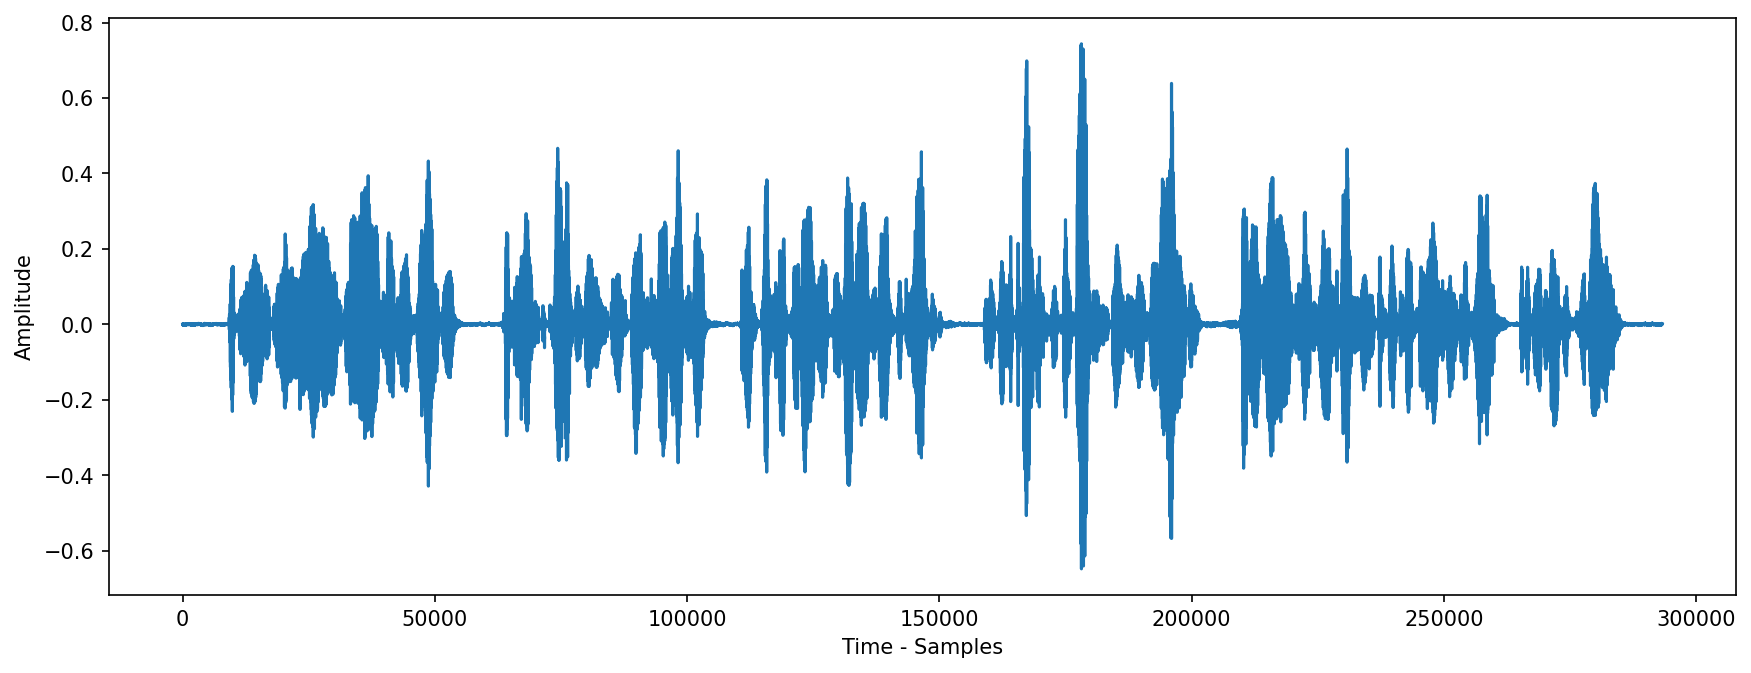

In [ ]:
plt.figure(figsize=(14, 5), dpi=150)
plt.plot(y)
plt.xlabel("Time - Samples")
plt.ylabel("Amplitude");

In [ ]:
len(y) / sr

18.33

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=y, rate=sr)

In [ ]:
# DFT - Discrete Fourier Transform
window = np.hanning(len(y))
windowed_input = y * window
dft = np.fft.rfft(windowed_input)

In [ ]:
dft

array([-1.86261994e+01+0.00000000e+00j,  9.28135505e+00+1.32683733e-01j,
        1.58371706e-01-1.37403646e-02j, ...,
        5.96883425e-05+1.24873961e-04j, -4.06976410e-05-8.91529285e-05j,
        1.86791506e-05+0.00000000e+00j])

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


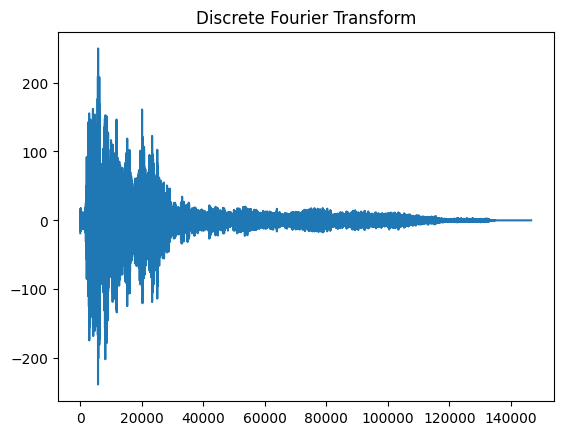

In [ ]:
plt.plot(dft)
plt.title("Discrete Fourier Transform");

In [ ]:
amplitude = np.abs(dft)

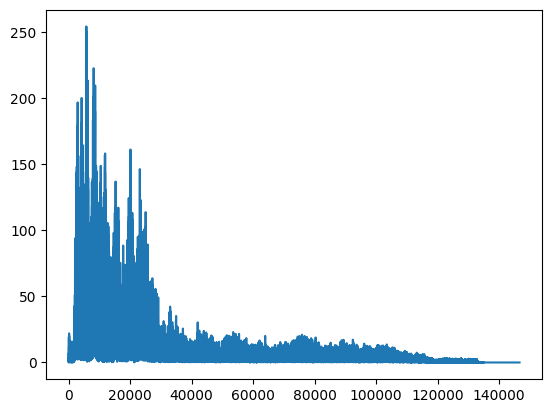

In [ ]:
plt.plot(amplitude);

In [ ]:
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

In [ ]:
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(y))

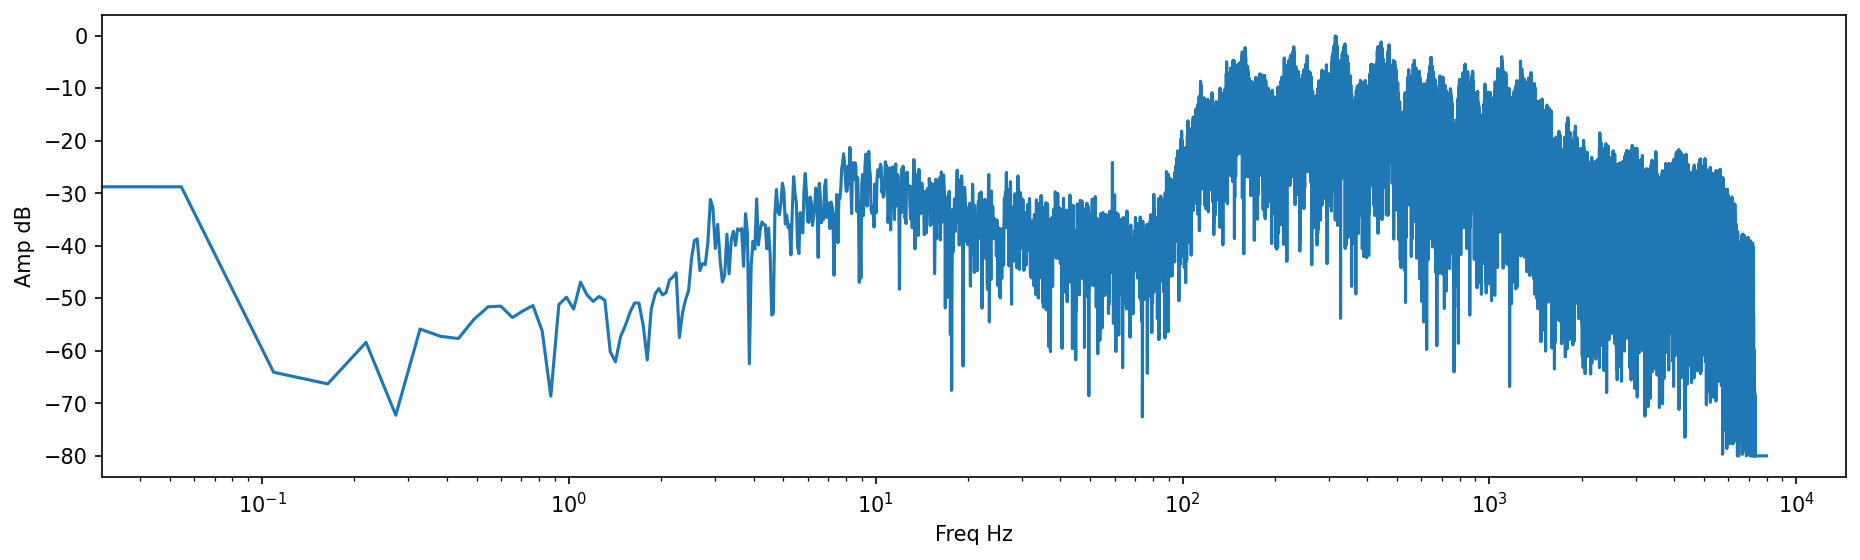

In [ ]:
plt.figure(figsize=(15, 4), dpi=150)
plt.plot(frequency, amplitude_db)
plt.xlabel("Freq Hz")
plt.ylabel("Amp dB");
plt.xscale("log"); # logarithm

In [ ]:
D = librosa.stft(y)
D

array([[-3.9062458e-01+0.00000000e+00j, -4.2117184e-01+0.00000000e+00j,
         1.1969010e-02+0.00000000e+00j, ...,
        -6.5407574e-02+0.00000000e+00j, -6.5767783e-01+0.00000000e+00j,
        -5.0403225e-01+0.00000000e+00j],
       [ 2.1504030e-01-2.72883296e-01j,  3.9520788e-01+2.35286862e-01j,
        -1.8954851e-01+2.01399028e-01j, ...,
         3.1809140e-02-5.20105779e-01j,  4.7990891e-01-7.20481798e-02j,
         3.0529091e-01+2.31271148e-01j],
       [ 6.6572405e-02+2.29919523e-01j, -2.2219624e-01-2.22454607e-01j,
         1.7292516e-01-1.01863794e-01j, ...,
         1.0541111e-02+3.11359972e-01j, -1.3832895e-01-1.56319544e-01j,
        -1.7233564e-01-4.72149439e-02j],
       ...,
       [ 1.0714734e-04-5.60417561e-07j, -5.3679560e-05-5.20152668e-08j,
        -1.5320092e-07+3.75490657e-07j, ...,
         6.0672232e-07-2.05872041e-07j, -6.9409925e-06+3.98072962e-06j,
         1.9291588e-04-1.26878978e-04j],
       [-1.0707157e-04+5.65493735e-07j,  7.7784847e-07+5.36762345e-0

In [ ]:
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

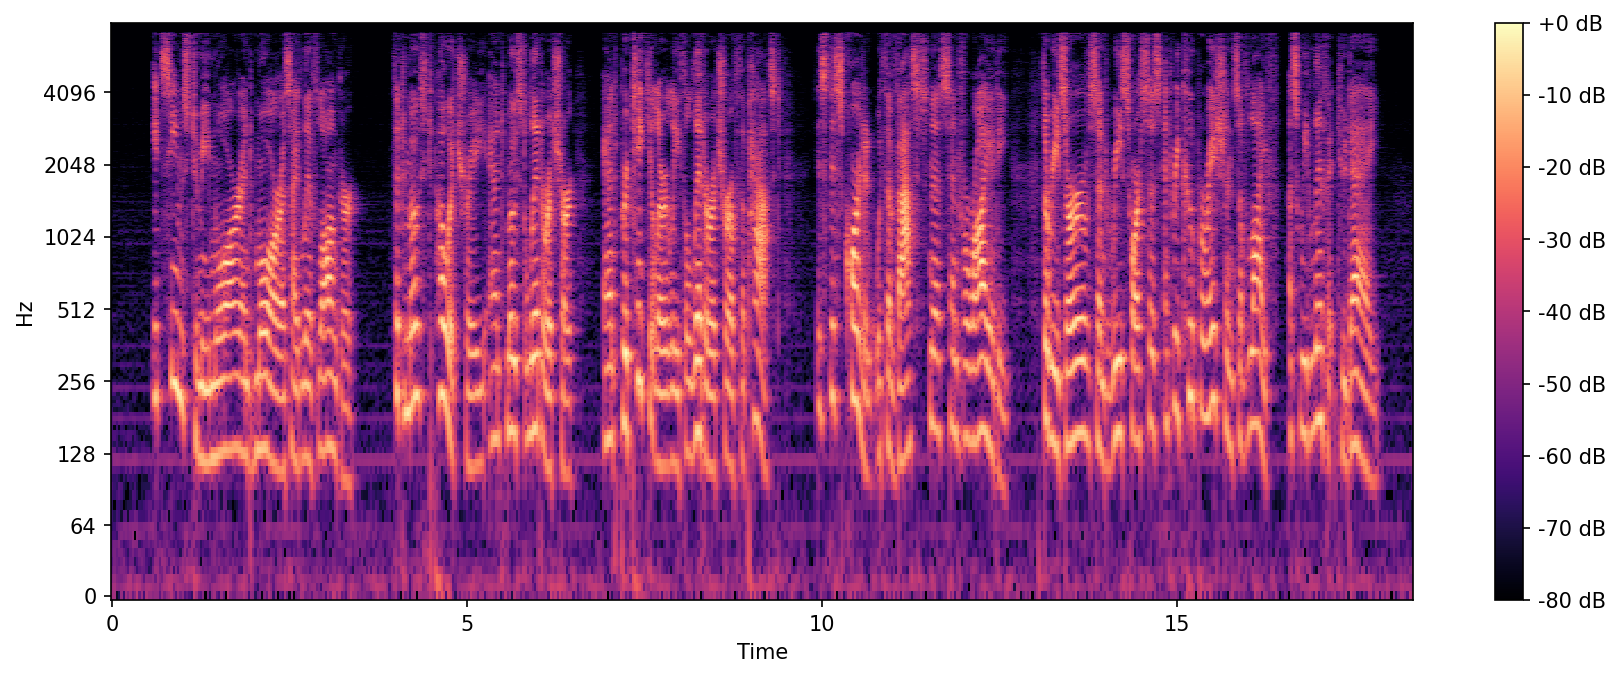

In [ ]:
plt.figure(figsize=(14, 5), dpi=150)
librosa.display.specshow(D_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")

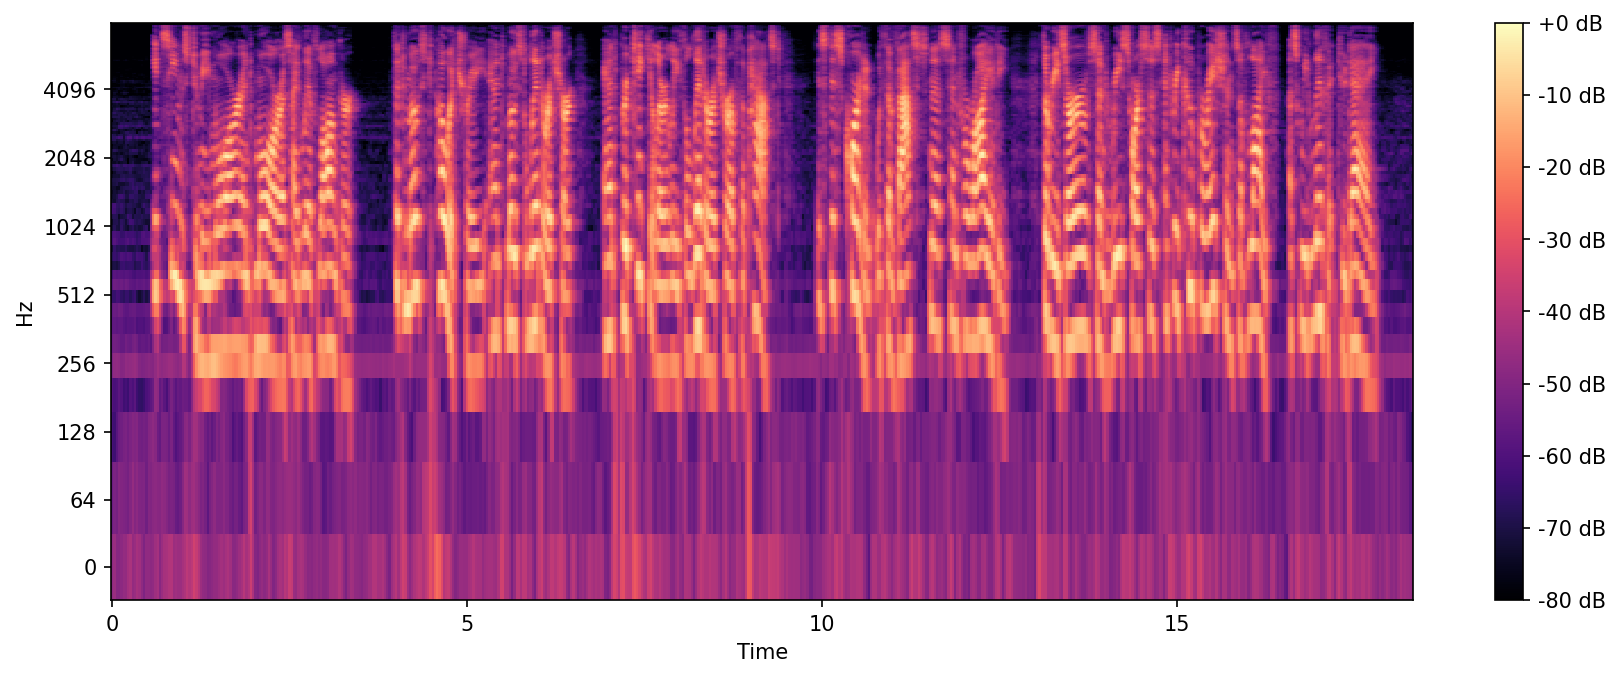

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(14, 5), dpi=150)
librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="log", fmax=8000)
plt.colorbar(format="%+2.0f dB")

## Import required libraries - Audio Classification

In [ ]:
import torch, transformers, torchaudio
print(torch.__version__)
print(transformers.__version__)
print(torchaudio.__version__)

2.9.0+cu126
4.57.3
2.9.0+cu126


## Audio Classification

In [ ]:
from transformers import AutoFeatureExtractor, ASTForAudioClassification

In [ ]:
import librosa

In [ ]:
audio_path = "audio.mp3"

In [ ]:
y, sr = librosa.load(audio_path, sr=None)

In [ ]:
y

array([0.00026489, 0.00024976, 0.00016459, ..., 0.00112344, 0.00131525,
       0.00124063], dtype=float32)

In [ ]:
sr

16000

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=audio_path)

In [ ]:
feature_extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [ ]:
result = feature_extractor(y, return_tensors="pt")

It is strongly recommended to pass the `sampling_rate` argument to `ASTFeatureExtractor()`. Failing to do so can result in silent errors that might be hard to debug.


In [ ]:
result["input_values"]

tensor([[[-0.9916, -1.2776, -1.0232,  ..., -1.2776, -1.2776, -1.2776],
         [-0.9121, -1.2776, -0.9703,  ..., -1.2776, -1.2776, -1.2776],
         [-0.8493, -1.2776, -0.9493,  ..., -1.2776, -1.2776, -1.2776],
         ...,
         [-0.9670, -1.2510, -0.8742,  ..., -1.1290, -1.2776, -1.2776],
         [-0.7404, -1.1572, -0.7803,  ..., -1.0399, -1.2776, -1.2776],
         [-1.2307, -1.2776, -1.0361,  ..., -1.1105, -1.2776, -1.2776]]])

In [ ]:
model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
model

ASTForAudioClassification(
  (audio_spectrogram_transformer): ASTModel(
    (embeddings): ASTEmbeddings(
      (patch_embeddings): ASTPatchEmbeddings(
        (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ASTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ASTLayer(
          (attention): ASTAttention(
            (attention): ASTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ASTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ASTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=T

In [ ]:
result["input_values"]

tensor([[[-0.9916, -1.2776, -1.0232,  ..., -1.2776, -1.2776, -1.2776],
         [-0.9121, -1.2776, -0.9703,  ..., -1.2776, -1.2776, -1.2776],
         [-0.8493, -1.2776, -0.9493,  ..., -1.2776, -1.2776, -1.2776],
         ...,
         [-0.9670, -1.2510, -0.8742,  ..., -1.1290, -1.2776, -1.2776],
         [-0.7404, -1.1572, -0.7803,  ..., -1.0399, -1.2776, -1.2776],
         [-1.2307, -1.2776, -1.0361,  ..., -1.1105, -1.2776, -1.2776]]])

In [ ]:
prediction_logits = model(result["input_values"]).logits

In [ ]:
prediction_logits

tensor([[  1.7607,  -3.6278,  -5.1216,  -7.7976,  -4.6517,  -3.2460,  -9.5137,
          -3.6803, -10.1801,  -9.8109,  -9.2966, -10.5910, -12.0996, -11.3894,
         -10.0550,  -7.3453,  -8.1254,  -9.6309,  -9.5075,  -8.7204,  -9.9590,
          -7.4435,  -9.4690,  -9.6452,  -8.1356,  -9.9139,  -7.7653,  -9.1153,
         -11.2206, -11.5307, -10.7970,  -8.6758,  -9.5446, -10.2912, -10.9546,
         -12.5483,  -9.6943, -10.3114,  -9.3938, -10.0388,  -8.9071,  -5.2119,
          -7.9866,  -8.8267,  -4.6785,  -7.5004,  -6.4128,  -8.1301,  -6.1485,
          -7.9236,  -8.6372,  -8.1780,  -7.1531,  -7.5999,  -7.6198,  -7.0706,
         -10.8478,  -9.5550, -10.1405,  -8.3671,  -9.2931,  -7.4139,  -6.8052,
          -7.8090, -10.0894, -10.1416, -10.3179,  -9.5295, -11.4273,  -9.4677,
          -9.6600, -12.1333,  -5.2777,  -6.3861,  -7.1100,  -8.6034,  -9.1236,
         -11.6775,  -8.4648,  -9.2849,  -8.7651,  -6.6391,  -8.5326,  -7.7665,
          -7.1364,  -8.4690,  -8.9067,  -8.4986,  -8

In [ ]:
predicted_class_ids = torch.argmax(prediction_logits, dim=-1).item()

In [ ]:
predicted_class_ids

0

In [ ]:
model.config.id2label

{0: 'Speech',
 1: 'Male speech, man speaking',
 2: 'Female speech, woman speaking',
 3: 'Child speech, kid speaking',
 4: 'Conversation',
 5: 'Narration, monologue',
 6: 'Babbling',
 7: 'Speech synthesizer',
 8: 'Shout',
 9: 'Bellow',
 10: 'Whoop',
 11: 'Yell',
 12: 'Battle cry',
 13: 'Children shouting',
 14: 'Screaming',
 15: 'Whispering',
 16: 'Laughter',
 17: 'Baby laughter',
 18: 'Giggle',
 19: 'Snicker',
 20: 'Belly laugh',
 21: 'Chuckle, chortle',
 22: 'Crying, sobbing',
 23: 'Baby cry, infant cry',
 24: 'Whimper',
 25: 'Wail, moan',
 26: 'Sigh',
 27: 'Singing',
 28: 'Choir',
 29: 'Yodeling',
 30: 'Chant',
 31: 'Mantra',
 32: 'Male singing',
 33: 'Female singing',
 34: 'Child singing',
 35: 'Synthetic singing',
 36: 'Rapping',
 37: 'Humming',
 38: 'Groan',
 39: 'Grunt',
 40: 'Whistling',
 41: 'Breathing',
 42: 'Wheeze',
 43: 'Snoring',
 44: 'Gasp',
 45: 'Pant',
 46: 'Snort',
 47: 'Cough',
 48: 'Throat clearing',
 49: 'Sneeze',
 50: 'Sniff',
 51: 'Run',
 52: 'Shuffle',
 53: 'Walk

In [ ]:
model.config.id2label[predicted_class_ids]

'Speech'

## Converting Audio to Text

In [ ]:
from transformers import pipeline

In [ ]:
pipe = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
pipe

In [ ]:
pipe("audio.mp3")

{'text': 'IT SEEMS TO ME MORE AND MORE AS I LIVE LONGER THAT MOST POETRY AND MOST LITERATURE AND PARTICULARLY THE LITERATURE OF THE PAST IS DISCORDANT WITH A VASTNESS AND VARIETY THE RESERVES AND RESOURCES AND RECUPERATIONS OF LIFE AS WE LIVE AT TO DAY'}

## Converting Text to Audio

In [ ]:
from transformers import pipeline
pipe = pipeline("text-to-speech")

No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
text = "I like coding in python"

In [ ]:
text

'I like coding in python'

In [ ]:
output = pipe(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [ ]:
output

{'audio': array([[ 1.1288763e-03,  7.6184905e-04,  8.4190624e-04, ...,
          6.3719926e-03,  3.6248148e-03, -8.1192906e-05]], dtype=float32),
 'sampling_rate': 24000}

In [ ]:
output["audio"]

array([[ 1.1288763e-03,  7.6184905e-04,  8.4190624e-04, ...,
         6.3719926e-03,  3.6248148e-03, -8.1192906e-05]], dtype=float32)

In [ ]:
output["audio"].shape

(1, 59840)

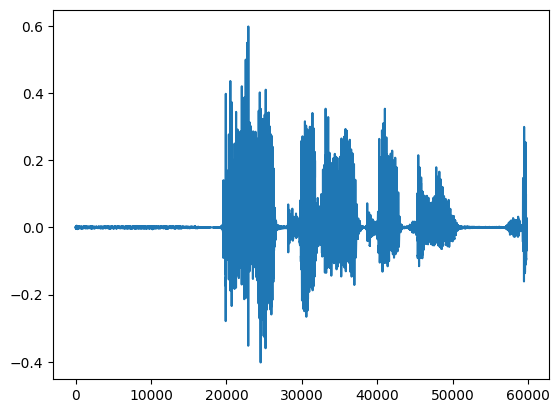

In [ ]:
plt.plot(output["audio"].squeeze());

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=output["audio"], rate=output["sampling_rate"])

In [ ]:
from pydub import AudioSegment

In [ ]:
audio_seg = AudioSegment(output["audio"].tobytes(),
                         frame_rate=output["sampling_rate"],
                         sample_width=output["audio"].dtype.itemsize,
                         channels=1)

In [ ]:
audio_seg.export("my_audio_saved.mp3", format="mp3")

<_io.BufferedRandom name='my_audio_saved.mp3'>